In [33]:
import shutil as st
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from matplotlib import pyplot as plt
import umap.umap_ as umap
import umap.plot as up

In [23]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from bokeh.plotting import show, save, output_notebook, output_file

In [11]:
%pip install umap-learn[plot]

     ---------------------------------------- 4.3/4.3 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 18.2/18.2 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 5.3 MB/s eta 0:00:00
     -------------------------------------- 292.8/292.8 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 18.5/18.5 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 12.0/12.0 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 86.8/86.8 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 76.5/76.5 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 870.9/870.9 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 42.8/42.8 kB 173.9 kB/s eta 0:00:00
     -------------------

In [24]:
dataset = fetch_20newsgroups(subset='all' , shuffle=True)
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [26]:
category_labels = [dataset.target_names[x] for x in dataset.target]
hover_df = pd.DataFrame(category_labels, columns = ['category'])

In [27]:
vectorizer = CountVectorizer(min_df=5, stop_words='english')
word_doc_matrix = vectorizer.fit_transform(dataset.data)

In [31]:
embedding = umap.UMAP(n_components=2, metric='cosine').fit(word_doc_matrix)

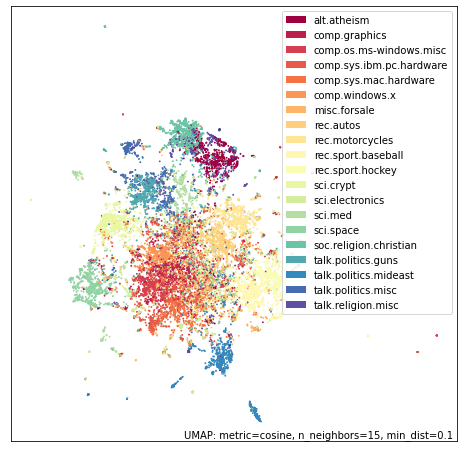

In [35]:
f = up.points(embedding, labels=hover_df['category'])